In [1]:
{}
import os
import numpy as np
import pprint
import pickle
import matplotlib.dates as mdates
import matplotlib.pyplot as plt



from pathlib import Path

In [2]:
# read in the matrices to inspect

p = Path('.').resolve().parent / 'lasso_and_n4sid' / 'n4sid_v1'

if p.exists():
    a_matrix = np.load(p / 'matrix_A1.npy')
    b_matrix = np.load(p / 'matrix_B1.npy')
    c_matrix = np.load(p / 'matrix_C1.npy')
    d_matrix = np.load(p / 'matrix_D1.npy')


In [3]:
print(a_matrix)
print(a_matrix.shape)
print(b_matrix)
print(b_matrix.shape)
print(c_matrix)
print(d_matrix)

[[ 0.98154062  0.00392863  0.01305596  0.00994301 -0.00620773 -0.03393096
   0.01451968  0.00945787]
 [ 0.20462503  0.88923136  0.03718339  0.00138765  0.10304766 -0.23615481
  -0.0292271   0.10253744]
 [ 0.84337744 -0.25996913  0.81063378  0.08407197  0.41340258  0.17511514
  -0.18206814  0.07113234]
 [-1.13376645  0.43389347  0.09257787  0.79322779  0.10973279  0.24918882
   0.03100918  0.02343908]
 [ 0.9180556  -0.39322804 -0.38310123 -0.19692349  0.77337838  0.26735187
  -0.06651764 -0.00315444]
 [-0.04663159  0.20924382  0.2769302   0.45830949 -0.06402696  0.43991173
  -0.40245776 -0.25000864]
 [ 0.56880797 -0.12315229 -0.17101381  0.04237984 -0.01335673  0.26500754
   0.43938171  0.12977529]
 [-0.50665319  0.6132963   0.11002295  0.51078421  0.28707335 -0.2386131
  -0.34388066 -0.44998195]]
(8, 8)
[[ 1.06739218e-06  3.10049417e-07  8.64458389e-07  2.65407124e-06
   1.88540480e-05 -1.84875570e-04  1.20371572e-04 -2.13067533e-05
   1.05997270e-05 -1.57168952e-03 -2.30996442e-08 -9.

In [18]:
# Version 3

p = Path('.').resolve().parent / 'lasso_and_n4sid' / 'n4sid_v3'

if p.exists():
    a_matrix = np.load(p / 'matrix_AK1.npy')
    b_matrix = np.load(p / 'matrix_BK1.npy')
    c_matrix = np.load(p / 'matrix_C1.npy')
    d_matrix = np.load(p / 'matrix_D1.npy')
    
display(a_matrix)
display(b_matrix)
_x = np.array([5, 5, 5])
_u = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

print(a_matrix.shape)
print(_x.shape)
    
print(b_matrix.shape)
print(_u.shape)

x_next = a_matrix @ _x + b_matrix @ _u
y_modeled = c_matrix @ _x + d_matrix @ _u

print(f"x_next is {x_next}")
print(f"y_modeled is {y_modeled}")



array([[-0.58772656, -0.05484999, -0.03070292],
       [-1.25653591, -0.15766376, -0.0704444 ],
       [ 1.44156839, -0.54128782, -0.13929845]])

array([[-2.76733146e-04, -4.00729107e-04, -3.75813866e-03,
         1.03071702e-06, -3.56493033e-08,  7.21066236e-08,
         1.04989708e-06,  1.67032337e-07,  5.42159590e-05,
         3.24855873e-04],
       [ 3.48147623e-04, -7.79597632e-04, -3.34187839e-03,
        -2.17535687e-06, -9.64016812e-09,  3.88379219e-10,
        -3.85899108e-07,  1.11176457e-07,  2.11183010e-03,
        -2.85055526e-04],
       [-3.64584550e-03,  1.10863789e-04,  7.41396884e-03,
        -1.44607323e-05,  2.62378883e-08, -1.52882841e-07,
        -4.94227931e-06,  1.68469233e-06,  3.47484698e-04,
         4.17967736e-03]])

(3, 3)
(3,)
(3, 10)
(10,)
x_next is [-5.28432860e+24  8.94920932e+24 -6.51324280e+24]
y_modeled is [3.94810848e+27]


       Type                Name
       ----                ----
      _tvp:             TDryBul
      _tvp:             HGloHor
      _tvp:     occupancy_ratio
      _tvp:     TSetpoint_Lower
      _tvp:     TSetpoint_Upper
      _tvp:            ElecCost
        _u:       heating_power
        _u:       cooling_power
        _u:     t_heat_setpoint
        _u:     t_cool_setpoint
        _x:            t_indoor
        _x:          t_indoor_1
        _x:          t_indoor_2
      _aux:         total_power
      _aux:                cost


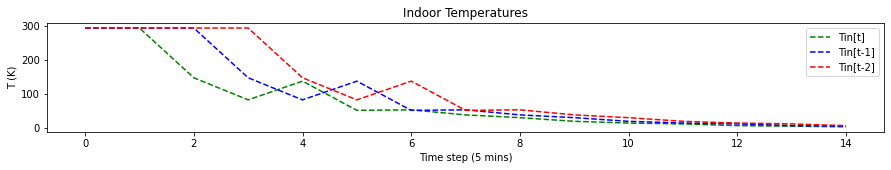

In [19]:
# parse some of the results!
# -- 003 is the statefeedback. 
results_file = Path('.').resolve() / 'results' / 'som3_mpc_stateestimator.pkl'
if p.exists():
    with open(results_file, 'rb') as f:
        results = pickle.load(f)

variables = results['mpc'].result_queries
print(f"{'Type':>11}{'Name':>20}")
print(f"{'----':>11}{'----':>20}")
for v in variables['ind']:
    if len(v) > 2:
        continue
    print(f"{v[0]:>10}:{v[1]:>20}")
    
    
# display(results['mpc'].data_fields)
# display(results['mpc']['_x'].__class__)

# TODO -- deal with time
# print(results['mpc']['_time'])

max_t = 15
fig, ax = plt.subplots(figsize=(15, 2))
plt.plot(results['mpc']['_x', 't_indoor'][:max_t], 'g--', label="Tin[t]")
plt.plot(results['mpc']['_x', 't_indoor_1'][:max_t], 'b--', label="Tin[t-1]")
plt.plot(results['mpc']['_x', 't_indoor_2'][:max_t], 'r--', label="Tin[t-2]")
# plt.plot(results['mpc']['_tvp', 'TSetpoint_Upper'][:max_t], label="TUpper")
# plt.plot(results['mpc']['_tvp', 'TSetpoint_Lower'][:max_t], label="Tlower")

# plt.plot(index, row['EMA26'], marker='o', markersize=5, color="darkred")
# plt.axvline(x=index, linewidth=2, color='r')

plt.title('Indoor Temperatures')
plt.xlabel('Time step (5 mins)')
plt.ylabel('T (K)')
plt.legend()

# test the y_meas calculation


# display(results['mpc'].keys())

# dir(results['mpc'].result_queries)

The x_matrix init: [-0.8194 -0.029  -0.006 ]


Text(0.5, 0, 'Time step (5 mins)')

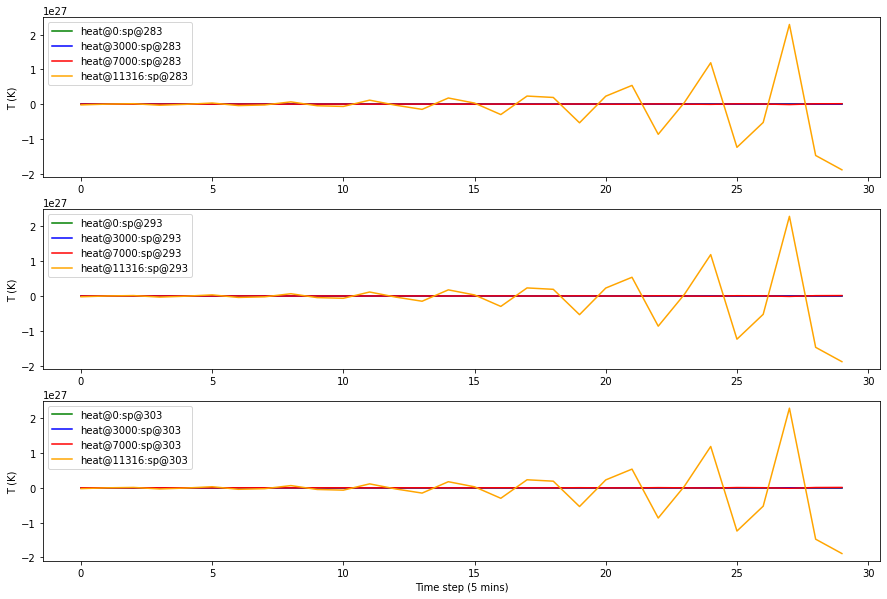

In [13]:
## Test if the temperature increases with the x's and u's given in the MPC
from collections import deque

# t_dry_bulb,
# h_glo_hor,
# occupancy_ratio,
# t_heat_setpoint - t_indoor,
# t_indoor_1 - t_cool_setpoint,
# t_dry_bulb - t_indoor_1,
# heating_power,
# cooling_power,
# t_indoor_1,
# t_indoor_1 - t_indoor_2,

# construst the x and u matrix
t_init = 0
# _x = results['mpc']['_x', 'x'][t_init]s
_x = np.array([-0.8194, -0.029, -0.006])
print(f"The x_matrix init: {_x}")

sims = {}

t_heat_setpoint_range = [283, 293, 303]
heating_range = [0, 3000, 7000, 11316]
for t_heat_setpoint in t_heat_setpoint_range:
    for heat in heating_range:
        index = f"{t_heat_setpoint}_{heat}"
        sims[index] = {}
        sims[index]["temperature"] = []
        temps = deque([293, 293, 293])

        t_cool_setpoint = 298
        # var to store results

        for t in range(0,30):

        #     _u = np.array([
        #         results['mpc']['_tvp', 'TDryBul'][t][0],
        #         results['mpc']['_tvp', 'HGloHor'][t][0],
        #         results['mpc']['_tvp', 'occupancy_ratio'][t][0],
        #         results['mpc']['_u', 't_heat_setpoint'][t][0] - results['mpc']['_x', 't_indoor'][t][0],
        #         results['mpc']['_x', 't_indoor'][t][0] - results['mpc']['_u', 't_cool_setpoint'][t][0],
        #         results['mpc']['_tvp', 'TDryBul'][t][0] - results['mpc']['_x', 't_indoor_1'][t][0],
        #         results['mpc']['_u', 'heating_power'][t][0],
        #         results['mpc']['_u', 'cooling_power'][t][0],
        #         results['mpc']['_x', 't_indoor_1'][t][0],
        #         results['mpc']['_x', 't_indoor_1'][t][0] - results['mpc']['_x', 't_indoor_2'][t][0],
        #     ])

            t_indoor = temps.popleft()
            t_indoor_1 = temps[0]
            t_indoor_2 = temps[1]

            # force some of these variables as fixed
            _u = np.array([
                273, # freezing outside
                0,  # no sun
                t_indoor_1, # previous value of the temperature
                t_heat_setpoint - t_indoor, # heating term
                11316,  # full heating power
                0,      # no cooling
                t_indoor - t_cool_setpoint, #cooling term 
                5,  # full occupancy
                t_indoor_1 - t_indoor_2, #delta of temperatures 
                273 - t_indoor_1 #infiltration term 
            ])


        #     print(_u)
        #     display(_x)
        #     print(a_matrix.shape)
        #     print(_x.shape)

        #     print(b_matrix.shape)
        #     print(_u.shape)
            x_next = a_matrix @ _x + b_matrix @ _u
            y_modeled = c_matrix @ _x + d_matrix @ _u
        #     display(x_next)
        #     display(y_modeled)
            _x = x_next

            temps.append(y_modeled[0])        
            sims[index]["temperature"].append(y_modeled[0])

        #     print(temps)
#             print(f"Indoor air temperature do-mpc: {results['mpc']['_x', 't_indoor'][t][0]:.2f}, y_modeled: {y_modeled[0]:.2f}. H_sp: {t_heat_setpoint} C_sp: {t_cool_setpoint} ")


fig = plt.figure(figsize=(15, 10))
colors = ['green', 'blue', 'red', 'orange']
for i_1, t_heating_setpoint in enumerate(t_heat_setpoint_range):
    fig.add_subplot(len(t_heat_setpoint_range), 1, i_1+1)

    for i_2, heat in enumerate(heating_range):
        index = f"{t_heat_setpoint}_{heat}"
        plt.plot(sims[index]["temperature"], colors[i_2], label=f"heat@{heat}:sp@{t_heating_setpoint}")

    plt.ylabel('T (K)')
    plt.legend()
#     plt.title('Indoor Temperatures')

plt.xlabel('Time step (5 mins)')

